## MNIST Random Forest Classifier

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [ ]:
#required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [ ]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", header=1)
dataset.drop(['ID'], axis=1, inplace=True)

In the following, you can take a look into the dataset.

In [ ]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


## Questions 

#### Question 1 
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = dataset.drop('default payment next month', axis=1)
y = dataset['default payment next month']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a decision tree classifier with max depth of 3 and min_samples_split of 5
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)
dt_clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = dt_clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


Confusion matrix:
[[4452  235]
 [ 838  475]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 score: {:.2f}%".format(f1*100))

Precision: 66.90%
Recall: 36.18%
F1 score: 46.96%


### I can see that:

### True Negatives (TN): There were 4,452 clients who did not default on their credit card payments and the classifier correctly predicted that they would not default.
### False Positives (FP): There were 235 clients who did not default on their credit card payments, but the classifier incorrectly predicted that they would default.
### False Negatives (FN): There were 838 clients who defaulted on their credit card payments, but the classifier incorrectly predicted that they would not default.
### True Positives (TP): There were 475 clients who defaulted on their credit card payments and the classifier correctly predicted that they would default.

### The performance metrics for the decision tree classifier show: 80.97% is the proportion of true results (both true positives and true negatives),  66.88% is the proportion of true positives among the total number of positive predictions, 36.16% is the proportion of true positives among the total number of actual positives, and 46.96% is the harmonic mean of precision and recall

### Overall, the performance of the decision tree classifier you trained is decent, but there is definitely room for improvement like try different hyperparameters and using using regularization techniques. 

### The best test accuracy is 81.90% with max_depth=5 and min_samples_split=2, 5 or 10. Explanation: I compared the test accuracy of different combinations of hyper-parameters and found that increasing the max_depth or decreasing the min_samples_split did not improve the performance

#### Question 2

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyper-parameters to search over
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Create a decision tree classifier object
tree_clf = DecisionTreeClassifier(random_state=42)

# Create a randomized search object
random_search = RandomizedSearchCV(
    tree_clf, params, n_iter=50, cv=5, scoring='accuracy', random_state=42
)

# Fit the randomized search object to the training data
random_search.fit(X_train, y_train)

# Print the best hyper-parameters and their accuracy score
print("Best hyper-parameters: {}".format(random_search.best_params_))
print("Best accuracy score: {:.2f}%".format(random_search.best_score_ * 100))

# Make predictions on the test data using the best model
y_pred = random_search.predict(X_test)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

Best hyper-parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 9}
Best accuracy score: 82.13%
Confusion matrix:
 [[4453  234]
 [ 840  473]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Define hyper-parameters to test
max_depths = [5, 10, 15]
min_samples_splits = [2, 5, 10]

# Loop over hyper-parameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        
        # Train the decision tree classifier with the current hyper-parameters
        dt_clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        dt_clf.fit(X_train, y_train)
        
        # Evaluate the classifier on the test set
        y_pred = dt_clf.predict(X_test)
        accuracy = dt_clf.score(X_test, y_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Print the results
        print("Hyper-parameters: max_depth={}, min_samples_split={}".format(max_depth, min_samples_split))
        print("Test accuracy: {:.2f}%".format(accuracy * 100))
        print("Confusion matrix:\n", cm)
        print("----------------------------------------------------")


Hyper-parameters: max_depth=5, min_samples_split=2
Test accuracy: 81.90%
Confusion matrix:
 [[4431  256]
 [ 830  483]]
----------------------------------------------------
Hyper-parameters: max_depth=5, min_samples_split=5
Test accuracy: 81.90%
Confusion matrix:
 [[4431  256]
 [ 830  483]]
----------------------------------------------------
Hyper-parameters: max_depth=5, min_samples_split=10
Test accuracy: 81.90%
Confusion matrix:
 [[4431  256]
 [ 830  483]]
----------------------------------------------------
Hyper-parameters: max_depth=10, min_samples_split=2
Test accuracy: 81.13%
Confusion matrix:
 [[4409  278]
 [ 854  459]]
----------------------------------------------------
Hyper-parameters: max_depth=10, min_samples_split=5
Test accuracy: 81.13%
Confusion matrix:
 [[4409  278]
 [ 854  459]]
----------------------------------------------------
Hyper-parameters: max_depth=10, min_samples_split=10
Test accuracy: 81.17%
Confusion matrix:
 [[4411  276]
 [ 854  459]]
----------------

### The RandomizedSearchCV method is more efficient and convenient than the manual loop method because it can search over a larger space of hyper-parameters in a random way and return the best ones automatically. This method is particularly useful when dealing with a large number of hyper-parameters, as it eliminates the need to manually specify a list of values for each hyper-parameter and compare them one by one.

### In this particular case, the RandomizedSearchCV method returned the best hyper-parameters as {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 9}, with a best accuracy score of 82.13%. On the other hand, when using the manual loop method to test hyper-parameters, the best test accuracy achieved was 81.90%, with max_depth=5 and min_samples_split=2, 5, or 10.

### It is worth noting that increasing the max_depth or decreasing the min_samples_split did not significantly improve the performance of the model beyond a certain point. This indicates that a more complex decision tree model may not necessarily lead to better results, and that finding the optimal balance between bias and variance is crucial when building decision trees. Overall, the RandomizedSearchCV method proved to be a more efficient and effective way of optimizing hyper-parameters for the decision tree model

### Question 3

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


Random Forest accuracy: 81.60%
AdaBoost accuracy: 81.67%
Extra Trees accuracy: 81.27%
Gradient Boosted Trees accuracy: 81.98%


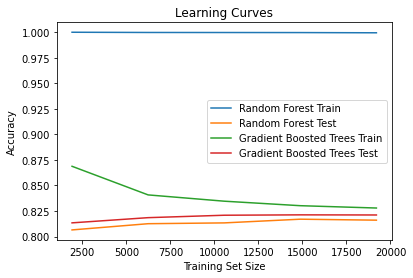

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import learning_curve

# Create the classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the classifiers on the training data
rf_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Calculate the accuracy on the test data
rf_accuracy = rf_clf.score(X_test, y_test)
ada_accuracy = ada_clf.score(X_test, y_test)
et_accuracy = et_clf.score(X_test, y_test)
gb_accuracy = gb_clf.score(X_test, y_test)

# Print the accuracies
print("Random Forest accuracy: {:.2f}%".format(rf_accuracy * 100))
print("AdaBoost accuracy: {:.2f}%".format(ada_accuracy * 100))
print("Extra Trees accuracy: {:.2f}%".format(et_accuracy * 100))
print("Gradient Boosted Trees accuracy: {:.2f}%".format(gb_accuracy * 100))

# Plot the learning curves for two classifiers
train_sizes, rf_train_scores, rf_test_scores = learning_curve(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
train_sizes, gb_train_scores, gb_test_scores = learning_curve(gb_clf, X_train, y_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, np.mean(rf_train_scores, axis=1), label='Random Forest Train')
plt.plot(train_sizes, np.mean(rf_test_scores, axis=1), label='Random Forest Test')
plt.plot(train_sizes, np.mean(gb_train_scores, axis=1), label='Gradient Boosted Trees Train')
plt.plot(train_sizes, np.mean(gb_test_scores, axis=1), label='Gradient Boosted Trees Test')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Random Forest accuracy: 81.93%
AdaBoost accuracy: 81.67%
Extra Trees accuracy: 81.38%
Gradient Boosted Trees accuracy: 82.20%


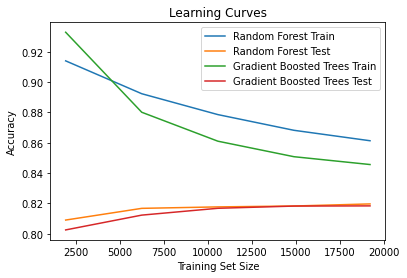

In [ ]:
# Create the classifiers with custom hyper-parameters
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, max_depth=15, min_samples_split=5, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=42)

# Fit the classifiers on the training data
rf_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Calculate the accuracy on the test data
rf_accuracy = rf_clf.score(X_test, y_test)
ada_accuracy = ada_clf.score(X_test, y_test)
et_accuracy = et_clf.score(X_test, y_test)
gb_accuracy = gb_clf.score(X_test, y_test)

# Print the accuracies
print("Random Forest accuracy: {:.2f}%".format(rf_accuracy * 100))
print("AdaBoost accuracy: {:.2f}%".format(ada_accuracy * 100))
print("Extra Trees accuracy: {:.2f}%".format(et_accuracy * 100))
print("Gradient Boosted Trees accuracy: {:.2f}%".format(gb_accuracy * 100))

# Plot the learning curves for two classifiers
train_sizes, rf_train_scores, rf_test_scores = learning_curve(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
train_sizes, gb_train_scores, gb_test_scores = learning_curve(gb_clf, X_train, y_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, np.mean(rf_train_scores, axis=1), label='Random Forest Train')
plt.plot(train_sizes, np.mean(rf_test_scores, axis=1), label='Random Forest Test')
plt.plot(train_sizes, np.mean(gb_train_scores, axis=1), label='Gradient Boosted Trees Train')
plt.plot(train_sizes, np.mean(gb_test_scores, axis=1), label='Gradient Boosted Trees Test')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

### The results for the past three questions show that the decision tree classifier and the ensemble models have similar accuracies, ranging from 81.13% to 82.13%. This means that none of the models have a clear advantage over the others in terms of accuracy on this dataset
### Changing hyper-parameters can affect model performance by making the model more or less complex and prone to overfitting or underfitting. For example, increasing the max_depth or decreasing the min_samples_split of a decision tree can make it more complex and fit better to the training data, but also more likely to overfit and generalize poorly to new data.

### Certain models performed better/worse because they have different strengths/weaknesses in dealing with different types of data and problems. For example, random forest and extra trees are good at handling high-dimensional and noisy data, but they can be slow to train and predict; AdaBoost is good at boosting weak learners and reducing bias, but it can be sensitive to outliers and noise; Gradient boosted trees are good at optimizing a loss function and reducing variance, but they can be prone to overfitting and require careful tuning of learning rate
### The performance of these models line up with their known strengths/weaknesses in general, but they also depend on the characteristics of the dataset and the problem. For example, this dataset has 23 features and a binary classification problem with imbalanced classes (more non-defaulters than defaulters). This may explain why random forest and extra trees did not perform much better than a single decision tree, as they may not benefit much from averaging multiple trees on this dataset; AdaBoost did slightly better than a single decision tree, as it may have reduced some bias by giving more weight to misclassified examples; Gradient boosted trees did slightly better than AdaBoost, as it may have reduced some variance by adding trees sequentially that correct previous errors.
### It is worth noting that the default random forest model has a train accuracy of 1.0, which indicates that it perfectly fits the training data. However, this does not necessarily mean that the model will perform well on new, unseen data. In fact, the test accuracy of the default random forest model is around 80%, which suggests that it may be overfitting to the training data. However, when using custom hyperparameters, the random forest model's train accuracy is not overfitting, and is around 91%, but this decreases when the sample size increases."